# Predicting Iris Species

In this case we are going to predict which type of Iris it is based on sepal and length characateristics.

## Load data file

Load the data file (iris.csv)

In [1]:
# Load a library
import pandas as pd

# Load the dataset
df = pd.read_csv('iris.csv')

# Preview the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [2]:
# Preview the first few observations/rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Preview the last few observations/rows
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Data exploration

In [4]:
# Statistical exploration
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data cleaning

Check for any missing data, if there is any perform corrective measures.

In [5]:
df.isnull().sum()

# P.S. No missing values observed

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Plot boxplots for data exploration

Plot a boxplot for each of the features against the label and write down your observations.

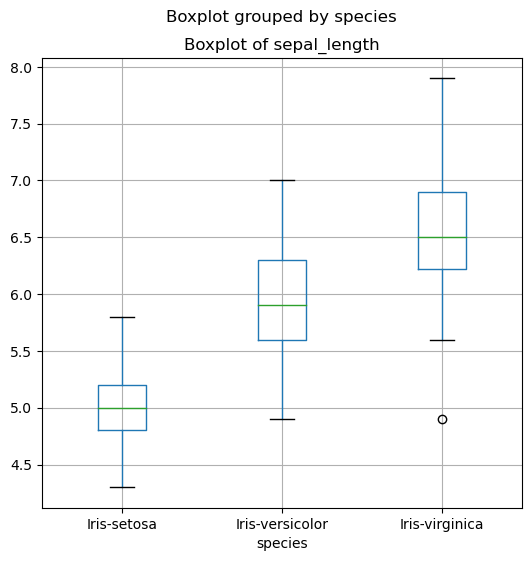

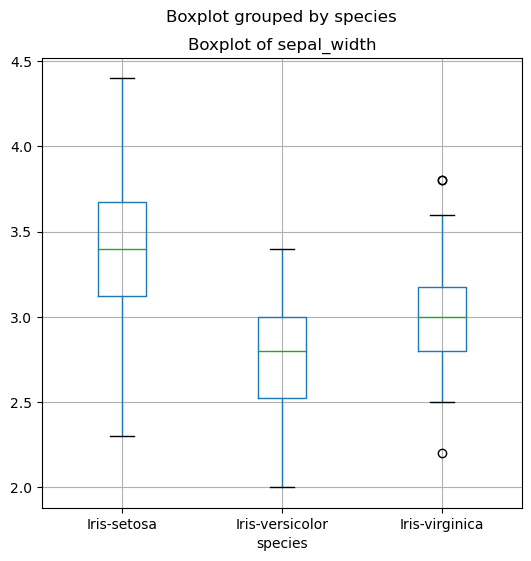

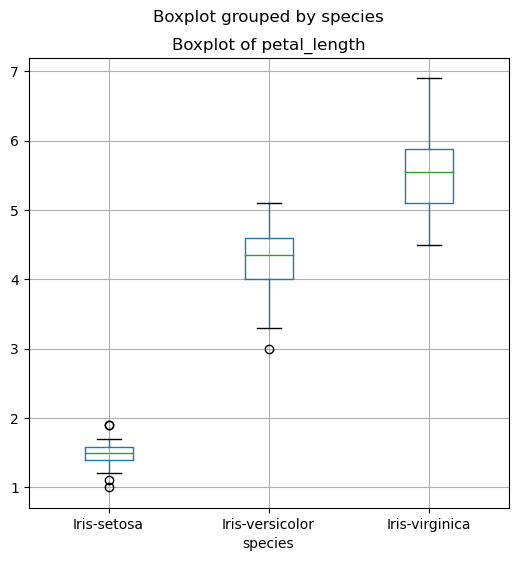

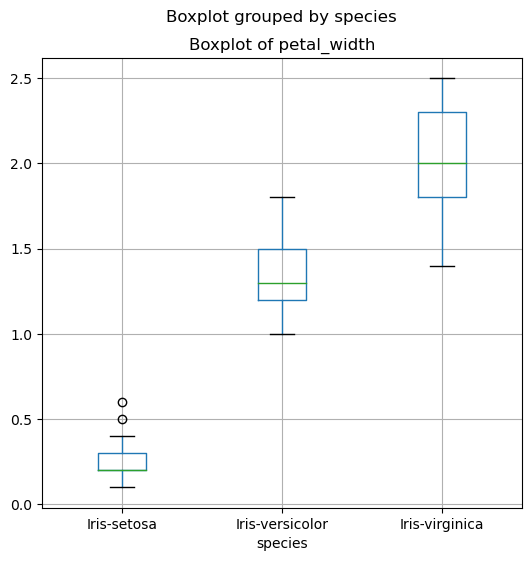

In [6]:
# Load a library for visual
from matplotlib import pyplot as plt

# Define predictors and target
predictors = ['sepal_length','sepal_width','petal_length','petal_width']
target = 'species'

for feature in predictors:
    df.boxplot(feature, by=target, figsize=(6,6))
    plt.title(f'Boxplot of {feature}')
    plt.show()

## Split Data

Split the data with a ratio that you see fit. Make sure to set random_state, and to use stratification.

In [8]:
from sklearn.model_selection import train_test_split

# Split data
X, y = df[predictors].values, df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print('Training set %d\nTest set %d\n' % (X_train.shape[0], X_test.shape[0]))

Training set 105
Test set 45



## Train Model and Predict 

You are to train the model using a DecisionTreeClassifier. Then use the model to predict the labels.

In [9]:
# Import library
from sklearn.tree import DecisionTreeClassifier

# Train the model
model_d3 = DecisionTreeClassifier().fit(X_train, y_train)

# Do predictions
predictions_d3 = model_d3.predict(X_test)

In [15]:
# Train a different model, a RandomForestClassifier

# Import library
from sklearn.ensemble import RandomForestClassifier

# Train model
model_rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Do predictions
predictions_rf = model_rf.predict(X_test)

## Generate a Classification Report

Generate the precision, recall, and F1 Score, and write down your observations.

In [10]:
# Load library
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, predictions_d3))

# P.S. A near perfect model with an overall accuracy of 98%

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [16]:
# Print classification report for the random forest classifier
print(classification_report(y_test, predictions_rf))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



## Generate a Confusion Matrix

Generate a confusion matrix and write down your observations.

In [11]:
# Load a library
from sklearn.metrics import confusion_matrix

# Get the confusion matrix and print
cm_d3 = confusion_matrix(y_test, predictions_d3)

print(cm_d3)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [17]:
# Get and print confusion matrix for Random Forest classifier
cm_rf = confusion_matrix(y_test, predictions_rf)

print(cm_rf)

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


## Generate an AUC score

Generate the AUC score and write down your observations.

In [14]:
# Load library
from sklearn.metrics import roc_auc_score

# Generate the AUC and print
probs_d3 = model_d3.predict_proba(X_test)

auc_d3 = roc_auc_score(y_test, probs_d3, multi_class='ovr')

print('Average AUC for Decision Tree: ', auc_d3)

Average AUC for Decision Tree:  0.9833333333333334


In [18]:
# Generate and print the AUC for the Random Forest Classifier
probs_rf = model_rf.predict_proba(X_test)

auc_rf = roc_auc_score(y_test, probs_rf, multi_class='ovr')

print('Average AUC for Random Forest: ', auc_rf)

Average AUC for Random Forest:  1.0
